<a href="https://colab.research.google.com/github/nauvaldicaesar/POSTTEST_2_DataMining/blob/main/2109116040_Post_Test_2_Muhammad_Nauvaldi_Caesar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# (1) Apriori

Gunakan dataset ini : https://drive.google.com/file/d/1BqC-2d1ZYqFIFwdjdsW5bAAqNFh2AO4C/view?usp=share_link

Dan buatlah daftar support dan confidence untuk 2 item set dengan menggunakan dataset tersebut (hint : buatlah tabel tabulasi terlebih dahulu untuk memudahkan)

### Impor data ke dalam sebuah dataframe

In [26]:
import pandas as pd

df1 = pd.read_csv('https://raw.githubusercontent.com/nauvaldicaesar/dataset_dm/main/posttest2.csv')

### Menampilkan data yang telah ditabulasi dan disimpan ke dalam dataframe

In [27]:
df1

,whole milk,pasrty,salty snack,sausage,semi-finished bread,yogurt,soda,pickled vegetables,canned beer,misc. beverages,hygiene articles,rolls/buns,frankfurter,whipped/sour cream,curd,beef,white bread,butter,frozen vegetables,other vegetables,tropical fruit,sugar,butter milk,specialty chocolate,frozen meals,dental care,root vegetables,detergent,dish cleaner,cling film/bags
0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0


### Menghitung total dari setiap item yang ada pada dataframe

In [28]:
df1.sum()

whole milk             5
pasrty                 1
salty snack            1
sausage                4
semi-finished bread    1
yogurt                 1
soda                   3
pickled vegetables     1
canned beer            1
misc. beverages        1
hygiene articles       1
rolls/buns             3
frankfurter            2
whipped/sour cream     1
curd                   1
beef                   1
white bread            1
butter                 1
frozen vegetables      1
other vegetables       1
tropical fruit         1
sugar                  1
butter milk            1
specialty chocolate    1
frozen meals           1
dental care            1
root vegetables        1
detergent              1
dish cleaner           1
cling film/bags        1
dtype: int64

### Menampilkan kolom yang terdapat pada dataframe

In [29]:
print("List Kolom :\n")
for col in df1.columns:
  print(col)

List Kolom :

whole milk
pasrty
salty snack
sausage
semi-finished bread
yogurt
soda
pickled vegetables
canned beer
misc. beverages
hygiene articles
rolls/buns
frankfurter
whipped/sour cream
curd
beef
white bread
butter
frozen vegetables
other vegetables
tropical fruit
sugar
butter milk
specialty chocolate
frozen meals
dental care
root vegetables
detergent
dish cleaner
cling film/bags


### Menentukan kombinasi barang yang mungkin terjadi

In [30]:
from itertools import permutations #Library untuk buat kombinasi barang
combi_all = list(permutations(df1.columns, 2)) # untuk menyimpan seluruh kemungkinan kombinasi barang
combi_all # untuk menampilkan keseluruhan hasil kombinasi

[('whole milk', 'pasrty'),
 ('whole milk', 'salty snack'),
 ('whole milk', 'sausage'),
 ('whole milk', 'semi-finished bread'),
 ('whole milk', 'yogurt'),
 ('whole milk', 'soda'),
 ('whole milk', 'pickled vegetables'),
 ('whole milk', 'canned beer'),
 ('whole milk', 'misc. beverages'),
 ('whole milk', 'hygiene articles'),
 ('whole milk', 'rolls/buns'),
 ('whole milk', 'frankfurter'),
 ('whole milk', 'whipped/sour cream'),
 ('whole milk', 'curd'),
 ('whole milk', 'beef'),
 ('whole milk', 'white bread'),
 ('whole milk', 'butter'),
 ('whole milk', 'frozen vegetables'),
 ('whole milk', 'other vegetables'),
 ('whole milk', 'tropical fruit'),
 ('whole milk', 'sugar'),
 ('whole milk', 'butter milk'),
 ('whole milk', 'specialty chocolate'),
 ('whole milk', 'frozen meals'),
 ('whole milk', 'dental care'),
 ('whole milk', 'root vegetables'),
 ('whole milk', 'detergent'),
 ('whole milk', 'dish cleaner'),
 ('whole milk', 'cling film/bags'),
 ('pasrty', 'whole milk'),
 ('pasrty', 'salty snack'),
 ('

### Menentukan kombinasi item yang ada pada dataframe

In [31]:
hasil = [] # Menyimpan data dalam bentuk list
for combi_item in combi_all: # Mengulangi pembacaan dataset
  if len(df1[(df1[combi_item[0]]==1) & (df1[combi_item[1]]==1)]) >0: # Menentukan apakah kombinasi tersebut ada atau tidak
    hasil.append(combi_item) # Menyimpan hasil pengecekan dalam bentuk tuple didalam list
hasil # Menampilkan hasil

[('whole milk', 'pasrty'),
 ('whole milk', 'salty snack'),
 ('whole milk', 'sausage'),
 ('whole milk', 'semi-finished bread'),
 ('whole milk', 'yogurt'),
 ('whole milk', 'soda'),
 ('whole milk', 'rolls/buns'),
 ('whole milk', 'butter'),
 ('pasrty', 'whole milk'),
 ('pasrty', 'salty snack'),
 ('salty snack', 'whole milk'),
 ('salty snack', 'pasrty'),
 ('sausage', 'whole milk'),
 ('sausage', 'semi-finished bread'),
 ('sausage', 'yogurt'),
 ('sausage', 'hygiene articles'),
 ('sausage', 'rolls/buns'),
 ('semi-finished bread', 'whole milk'),
 ('semi-finished bread', 'sausage'),
 ('semi-finished bread', 'yogurt'),
 ('yogurt', 'whole milk'),
 ('yogurt', 'sausage'),
 ('yogurt', 'semi-finished bread'),
 ('soda', 'whole milk'),
 ('soda', 'pickled vegetables'),
 ('soda', 'frankfurter'),
 ('soda', 'whipped/sour cream'),
 ('pickled vegetables', 'soda'),
 ('canned beer', 'misc. beverages'),
 ('misc. beverages', 'canned beer'),
 ('hygiene articles', 'sausage'),
 ('rolls/buns', 'whole milk'),
 ('rolls

### Menghitung jumlah kombinasi tiap - tiap item set pada dataframe

In [32]:
hasil_akhir = {} # Menyimpan data dalam bentuk dictionary
for itemset in hasil:  # Mengulangi pembacaan dataset
  banyak_data= len(df1[
      (df1[itemset[0]]==1) & (df1[itemset[1]]==1) # Menentukan berapa jumlah kemunculan kombinasi dan menyimpannya dalam sebuah variabel
      ])
  hasil_akhir[str(itemset)] = banyak_data # Menambahkan hasil penentuan ke dalam dictionary
hasil_akhir # Menampilkan hasil

{"('whole milk', 'pasrty')": 1,
 "('whole milk', 'salty snack')": 1,
 "('whole milk', 'sausage')": 2,
 "('whole milk', 'semi-finished bread')": 1,
 "('whole milk', 'yogurt')": 1,
 "('whole milk', 'soda')": 1,
 "('whole milk', 'rolls/buns')": 1,
 "('whole milk', 'butter')": 1,
 "('pasrty', 'whole milk')": 1,
 "('pasrty', 'salty snack')": 1,
 "('salty snack', 'whole milk')": 1,
 "('salty snack', 'pasrty')": 1,
 "('sausage', 'whole milk')": 2,
 "('sausage', 'semi-finished bread')": 1,
 "('sausage', 'yogurt')": 1,
 "('sausage', 'hygiene articles')": 1,
 "('sausage', 'rolls/buns')": 2,
 "('semi-finished bread', 'whole milk')": 1,
 "('semi-finished bread', 'sausage')": 1,
 "('semi-finished bread', 'yogurt')": 1,
 "('yogurt', 'whole milk')": 1,
 "('yogurt', 'sausage')": 1,
 "('yogurt', 'semi-finished bread')": 1,
 "('soda', 'whole milk')": 1,
 "('soda', 'pickled vegetables')": 1,
 "('soda', 'frankfurter')": 1,
 "('soda', 'whipped/sour cream')": 1,
 "('pickled vegetables', 'soda')": 1,
 "('can

### Menghitung Support

In [33]:
for item,ab in hasil_akhir.items(): # Untuk melakukan perulangan pembacaan dataset pada tiap - tiap kombinasi itemnya
    support = ab/len(df1)*100 # Menghitung support pada tiap tiap kombinasi item
    print(f"{item} support = {support:.3f}%") # Menampilkan  nilai support

('whole milk', 'pasrty') support = 5.263%
('whole milk', 'salty snack') support = 5.263%
('whole milk', 'sausage') support = 10.526%
('whole milk', 'semi-finished bread') support = 5.263%
('whole milk', 'yogurt') support = 5.263%
('whole milk', 'soda') support = 5.263%
('whole milk', 'rolls/buns') support = 5.263%
('whole milk', 'butter') support = 5.263%
('pasrty', 'whole milk') support = 5.263%
('pasrty', 'salty snack') support = 5.263%
('salty snack', 'whole milk') support = 5.263%
('salty snack', 'pasrty') support = 5.263%
('sausage', 'whole milk') support = 10.526%
('sausage', 'semi-finished bread') support = 5.263%
('sausage', 'yogurt') support = 5.263%
('sausage', 'hygiene articles') support = 5.263%
('sausage', 'rolls/buns') support = 10.526%
('semi-finished bread', 'whole milk') support = 5.263%
('semi-finished bread', 'sausage') support = 5.263%
('semi-finished bread', 'yogurt') support = 5.263%
('yogurt', 'whole milk') support = 5.263%
('yogurt', 'sausage') support = 5.263%


### Menghitung Confidence

In [34]:
for item,ab in hasil_akhir.items(): # Untuk melakukan perulangan pembacaan dataset pada tiap - tiap kombinasi itemnya
  # A -> B 
  i = eval(item) # Ubah ke list dari string
  confidence = ab/df1[i[0]].sum()*100 # Menghitung confidence pada tiap tiap kombinasi item dan menampilkannya
  print(f"{i[0]}->{i[1]}  Confidence = {confidence:.1f}%") # Menampilkan hasil confidence

whole milk->pasrty  Confidence = 20.0%
whole milk->salty snack  Confidence = 20.0%
whole milk->sausage  Confidence = 40.0%
whole milk->semi-finished bread  Confidence = 20.0%
whole milk->yogurt  Confidence = 20.0%
whole milk->soda  Confidence = 20.0%
whole milk->rolls/buns  Confidence = 20.0%
whole milk->butter  Confidence = 20.0%
pasrty->whole milk  Confidence = 100.0%
pasrty->salty snack  Confidence = 100.0%
salty snack->whole milk  Confidence = 100.0%
salty snack->pasrty  Confidence = 100.0%
sausage->whole milk  Confidence = 50.0%
sausage->semi-finished bread  Confidence = 25.0%
sausage->yogurt  Confidence = 25.0%
sausage->hygiene articles  Confidence = 25.0%
sausage->rolls/buns  Confidence = 50.0%
semi-finished bread->whole milk  Confidence = 100.0%
semi-finished bread->sausage  Confidence = 100.0%
semi-finished bread->yogurt  Confidence = 100.0%
yogurt->whole milk  Confidence = 100.0%
yogurt->sausage  Confidence = 100.0%
yogurt->semi-finished bread  Confidence = 100.0%
soda->whole

#(2) KNN

Gunakan dataset ini : https://drive.google.com/file/d/1pXAJZZXCXosf0PTJkyogopKaPFxCYl22/view?usp=share_link

Kemudian buatlah tabel jarak berdasarkan data berikut ini : 

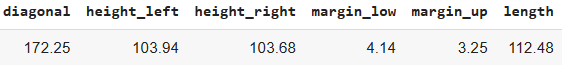
<!-- 1412 -->

### Mengimpor dan memasukkan dataset ke dalam dataframe

In [35]:
df2 = pd.read_csv('https://raw.githubusercontent.com/nauvaldicaesar/dataset_dm/main/deteksi_uang_palsu.csv')

### Menampilkan dataframe dalam bentuk tabel

In [36]:
df2

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
0,True,172.06,104.24,103.66,4.24,3.10,113.02
1,True,171.66,103.68,103.41,4.35,3.33,113.74
2,True,172.23,104.00,103.35,4.43,2.95,113.12
3,True,172.07,104.21,103.82,4.29,3.35,113.30
4,True,171.79,104.57,104.04,4.26,3.15,113.46
5,False,172.00,104.23,104.52,5.76,3.37,110.94
6,False,171.56,104.03,103.93,5.47,3.50,111.67
7,False,171.90,104.33,104.40,4.70,3.31,112.12
8,False,171.84,104.06,104.10,4.87,3.25,111.04
9,False,172.11,104.14,104.15,4.84,3.28,110.98


### Membuat tabel jarak berdasarkan data baru yang ingin ditambahkan

In [37]:
# import library numpy
import numpy as np

# membuat dataframe dari data baru
new_data = pd.DataFrame({'diagonal': [172.25],
                         'height_left': [103.94],
                         'height_right': [103.68],
                         'margin_low': [4.14],
                         'margin_up': [3.25],
                         'length': [112.48]})

# Menghitung jarak antara setiap baris dataframe utama dengan dataframe data baru
df2['distance'] = np.sqrt(
    (df2['diagonal'] - new_data['diagonal'].values[0])**2
    + (df2['height_left'] - new_data['height_left'].values[0])**2
    + (df2['height_right'] - new_data['height_right'].values[0])**2
    + (df2['margin_low'] - new_data['margin_low'].values[0])**2
    + (df2['margin_up'] - new_data['margin_up'].values[0])**2
    + (df2['length'] - new_data['length'].values[0])**2
)

# Menampilkan tabel jarak
print('Tabel Jarak : ')
print(df2['distance'])

Tabel Jarak : 
0    0.671267
1    1.458321
2    0.834626
3    0.910934
4    1.312593
5    2.421281
6    1.741896
7    1.113463
8    1.722034
9    1.738217
Name: distance, dtype: float64


### 1. Menambahkan kolom jarak

In [38]:
# setting pandas agar bisa menampilkan seluruh kolom dibaris yang sesuai
pd.set_option('display.max_columns', None)

# Mengatur lebar tabel menjadi 200
pd.set_option('display.width', 200)

print(df2)

   is_genuine  diagonal  height_left  height_right  margin_low  margin_up  length  distance
0        True    172.06       104.24        103.66        4.24       3.10  113.02  0.671267
1        True    171.66       103.68        103.41        4.35       3.33  113.74  1.458321
2        True    172.23       104.00        103.35        4.43       2.95  113.12  0.834626
3        True    172.07       104.21        103.82        4.29       3.35  113.30  0.910934
4        True    171.79       104.57        104.04        4.26       3.15  113.46  1.312593
5       False    172.00       104.23        104.52        5.76       3.37  110.94  2.421281
6       False    171.56       104.03        103.93        5.47       3.50  111.67  1.741896
7       False    171.90       104.33        104.40        4.70       3.31  112.12  1.113463
8       False    171.84       104.06        104.10        4.87       3.25  111.04  1.722034
9       False    172.11       104.14        104.15        4.84       3.28  110.9

### 2. Mengurutkan data berdasarkan K jarak terdekat (dengan k = akar 2 dari banyak data)

In [39]:
# Mengurutkan data dari kecil ke besar
sorted = df2.sort_values('distance')

# Menentukan nilai k
k = int(np.sqrt(len(df2)))

# Menentukan data terdekat
data_terdekat = sorted.head(k)

# Menampilkan data terdekat
print(data_terdekat)

   is_genuine  diagonal  height_left  height_right  margin_low  margin_up  length  distance
0        True    172.06       104.24        103.66        4.24       3.10  113.02  0.671267
2        True    172.23       104.00        103.35        4.43       2.95  113.12  0.834626
3        True    172.07       104.21        103.82        4.29       3.35  113.30  0.910934


### 3. Menentukan hasil prediksi berdasarkan label terbanyak

In [40]:
print("Berdasarkan jawaban nomor 2, maka hasil prediksinya adalah : True \n")

# Mengimpor library sklearn untuk menggunakan algoritma knn
from sklearn.neighbors import KNeighborsClassifier

# Split data menjadi data training dan data testing
X_train = df2.drop(columns=['is_genuine','distance'],axis=1)
y_train = df2['is_genuine']

# inisiasi data baru menjadi data tes
test_data = new_data

# membuat variabel knn yang berisikan algoritma KNN dengan nilai K = akar 2 dari banyak data
knn = KNeighborsClassifier(n_neighbors=k)

# melatih knn dengan data training
knn.fit(X_train, y_train)

# memprediksi hasil
prediksi = knn.predict(test_data)
print("Berdasarkan penggunaan library sklearn untuk memprediksi menggunakan Algoritma KNN, hasilnya adalah : "+ ' '.join(map(str, prediksi)))

Berdasarkan jawaban nomor 2, maka hasil prediksinya adalah : True 

Berdasarkan penggunaan library sklearn untuk memprediksi menggunakan Algoritma KNN, hasilnya adalah : True


# (3) Analisis

> Nama : Muhammad Nauvaldi Caesar

> Nim : 2109116040


Penjelasan posttest : 

Pilihlah salah satu tema dari daftar tema ini :  
1. Perbankan
2. Kesehatan
3. Ritel
4. Pendidkan

Kemudian lakukan analisis dengan menggunakan struktur CRISP-DM

Dimulai dari Business Understanding Hingga Data Preparation 
<img src="https://th.bing.com/th/id/R.f8efea41ae3cd96d86fbc5b10f81ad77?rik=K4Dr%2biIaVGvW8g&riu=http%3a%2f%2fwww.dataprix.com%2ffiles%2fCRISPDM%2fMetodologia_CRISP_DM1_html_52cdbecf.png&ehk=6ONLJMCVxE421Sjt2JJPE6MfCzrL7LLhDZQPdkJTLcw%3d&risl=&pid=ImgRaw&r=0"/>

Tentukan judul dengan ketentuan setiap orang di kelas beda-beda judulnya dan sumber datasetnya (contoh bisa prediksi atau aturan asosiasi)

Catatan : Tugas ini akan berhubungan dengan posttest terakhir (pertemuan 6)

##Judul

### Student performance prediction


## Business Understanding

Kumpulan data ini berasal dari Institut Nasional Diabetes dan Pencernaan dan Ginjal
Penyakit. Tujuan dari kumpulan data ini adalah untuk memprediksi secara diagnostik apakah seorang pasien menderita diabetes,
berdasarkan pengukuran diagnostik tertentu yang termasuk dalam kumpulan data. Beberapa kendala ditempatkan
pada pemilihan instance ini dari database yang lebih besar. Secara khusus, semua pasien di sini adalah perempuan
berusia minimal 21 tahun keturunan Indian Pima.2
Dari kumpulan data di File (.csv) Kita dapat menemukan beberapa variabel, beberapa di antaranya independen
(beberapa variabel prediktor medis) dan hanya satu variabel dependen target (Hasil).

## Data Understanding



#### Collect Initial Data

Data para pelanggan Bank Thera didapatkan dari website resmi kaggle dan dapat dilihat pada link berikut : https://www.kaggle.com/datasets/rkiattisak/student-performance-in-mathematics?resource=download 

Data yang sudah siap digunakan ada pada link ini : https://raw.githubusercontent.com/Daivageralda/dataset/main/Bank_Personal_Loan_Modelling.csv

In [41]:
# Import data ke dalam sebuah dataframe dengan nama df3

import pandas as pd
df3 = pd.read_csv('https://raw.githubusercontent.com/nauvaldicaesar/dataset_dm/main/exams.csv')

#### Describe Data

Dataset "Student Performance in Mathematics" yang tersedia di situs web Kaggle berisi informasi tentang 395 siswa dari sebuah sekolah menengah di Portugal. Data ini terdiri dari dua file:

student-mat.csv: berisi informasi tentang 395 siswa.
student-por.csv: berisi informasi tentang 649 siswa.
Jadi, total data yang dimiliki adalah 395 + 649 = 1044 data.

In [42]:
# Menampilkan data   
df3

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group D,some college,standard,completed,59,70,78
1,male,group D,associate's degree,standard,none,96,93,87
2,female,group D,some college,free/reduced,none,57,76,77
3,male,group B,some college,free/reduced,none,70,70,63
4,female,group D,associate's degree,standard,none,83,85,86
...,...,...,...,...,...,...,...,...
995,male,group C,some college,standard,none,77,77,71
996,male,group C,some college,standard,none,80,66,66
997,female,group A,high school,standard,completed,67,86,86
998,male,group E,high school,standard,none,80,72,62


In [43]:
print("Daftar kolom yang ada pada dataframe :")
for col in df3.columns:
  print(col)

Daftar kolom yang ada pada dataframe :
gender
race/ethnicity
parental level of education
lunch
test preparation course
math score
reading score
writing score


Penjelasan Kolom

1. gender = jenis kelamin
2. race/ethnicity = etnis
3. level


#### Explore Data

Beberapa kolom data akan divisualisasikan untuk menjelajahi data lebih lanjut lagi (menggunakan scatterplot dan countplot)


Pada countplot, beberapa kolom akan dibandingkan secara satu - persatu dengan kolom 'Personal Loan' untuk melihat apakah hubungan antara kolom - kolom ini berbanding lurus dengan kolom 'Personal Loan' atau sebaliknya

<Axes: xlabel='gender', ylabel='count'>

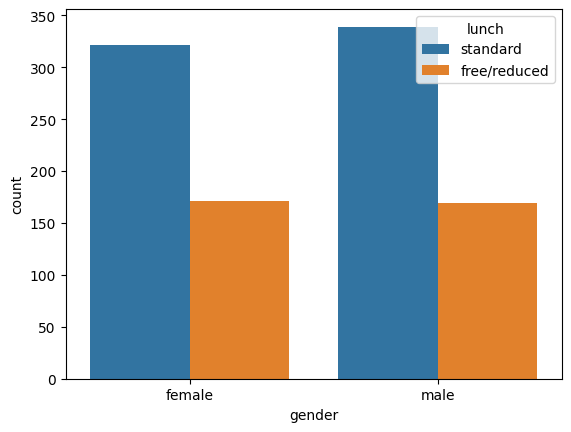

In [44]:
import seaborn as sns

sns.countplot(data=df3,x="gender",hue="lunch")

<Axes: xlabel='lunch', ylabel='count'>

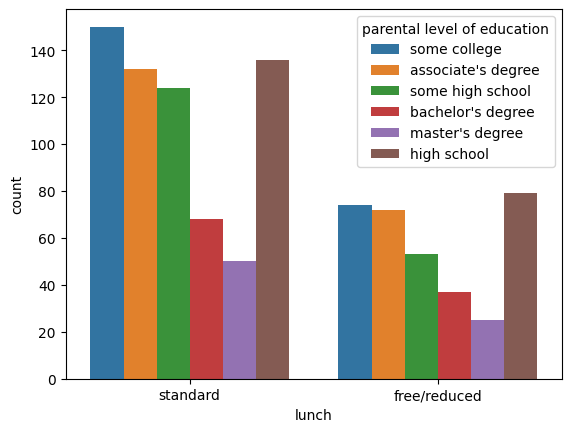

In [45]:
sns.countplot(data=df3,x="lunch",hue="parental level of education")

<class 'mpl_toolkits.mplot3d.axes3d.Axes3D'>


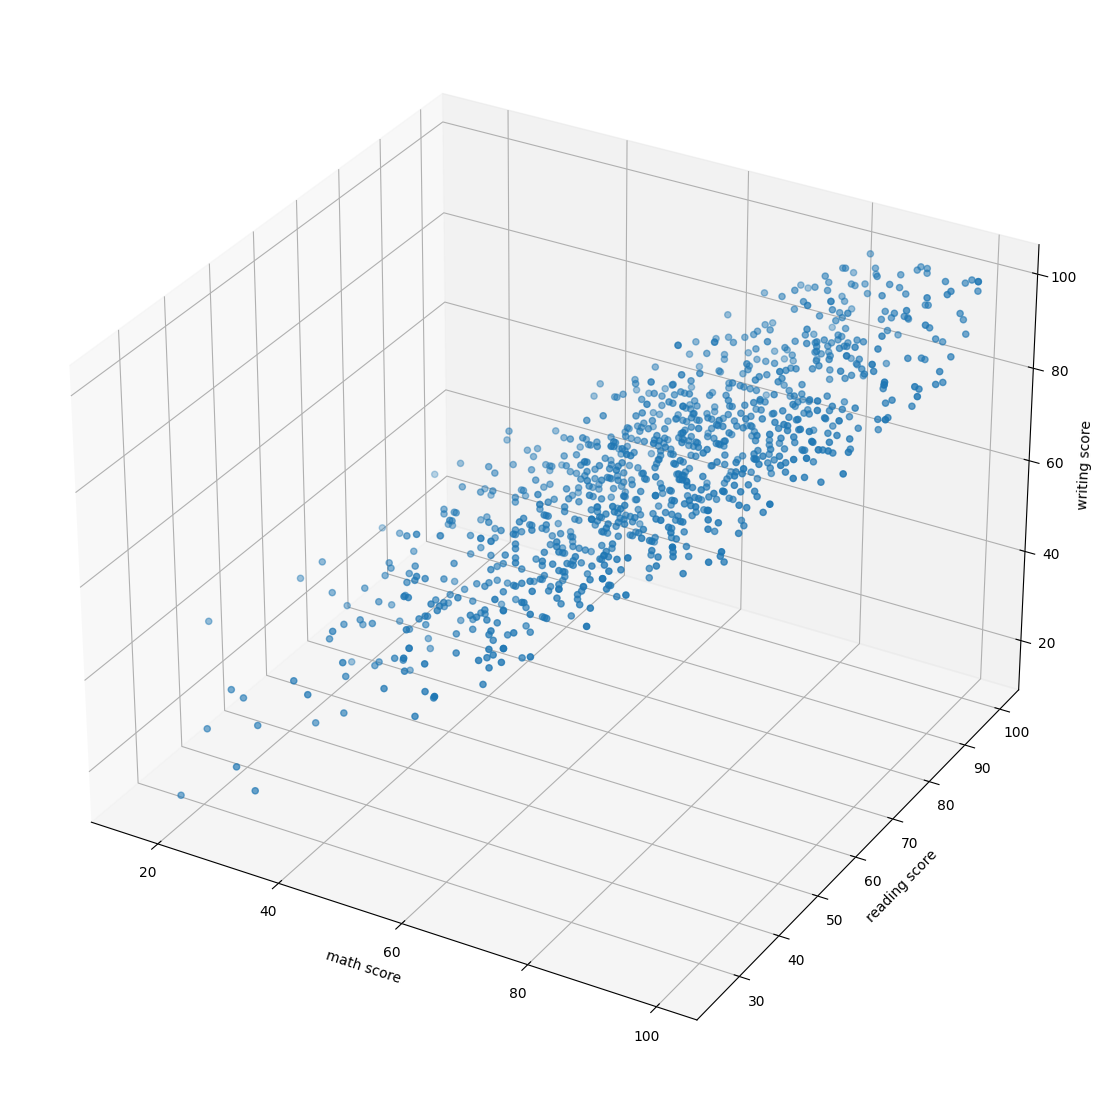

In [46]:
import matplotlib.pyplot as plot

plot.figure(figsize=(15,14))
axes = plot.axes(projection='3d')
print(type(axes))
axes.scatter3D(df3['math score'],df3['reading score'],df3['writing score'])

axes.set_xlabel('math score')
axes.set_ylabel('reading score')
axes.set_zlabel('writing score')
plot.show()

Sumbu x merupakan kategori umur nasabah. Sedangkan sumbu y merupakan lamanya pengalaman kerja nasabah dalam satuan tahun. Dan sumbu z merupakan rata - rata pengeluaran kartu kredit nasabah dalam satuan ribuan dolar.

Berdasarkan visualisasi di atas, dapat diketahui bahwa semakin tua nasabah, pengalaman kerjanya akan semakin tinggi yang menunjukkan bahwa hubungan umur dengan pengalaman kerja nasabah berbanding lurus. Sedangkan hubungan antara umur nasabah dengan pengeluaran kartu kredit mereka adalah berbanding sama, dikarenakan rata - rata pengeluaran mereka untuk seluruh kategori umur adalah sama. Lalu, hubungan antara pengalaman kerja nasabah dengan pengeluaran kartu kredit mereka juga berbanding sama dengan, diakarenakan rata - rata pengeluaran mereka juga sama untuk seluruh kategori pengelaman kerja

#### Verify Data Quality

Dilakukan verifikasi kualitas data dengan cara memeriksa data berdasarkan beberapa indikator kualitas data, seperti kelengkapan data, validitas data dan duplikasi data.

##### Validitas Data

Data - data yang tercakup pada dataframe di atas valid, karena berdasarkan sumber datanya, data tersebut adalah data nasabah yang tercatat pada saat kampanye dilakukan sehingga data - data tersebut cukup untuk digunakan dalam proyek ini

Link Dataset : https://www.kaggle.com/datasets/teertha/personal-loan-modeling

##### Duplikasi Data

In [47]:
is_duplicated = df3.duplicated().any()

print("Status Duplikasi :",is_duplicated)

Status Duplikasi : False


Berdasarkan output di atas, data - data yang pada dataframe tidak memiliki duplikasi data, didukung oleh adanya kolom ID atau identifikasi nasabah agar data - data mereka tidak terlantar, tertukar, terduplikasi, dan masalah lainnya

## Data Preparation

#### Select Data

In [48]:
import pandas as pd
df3 = pd.read_csv('https://raw.githubusercontent.com/nauvaldicaesar/dataset_dm/main/exams.csv')
df3

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group D,some college,standard,completed,59,70,78
1,male,group D,associate's degree,standard,none,96,93,87
2,female,group D,some college,free/reduced,none,57,76,77
3,male,group B,some college,free/reduced,none,70,70,63
4,female,group D,associate's degree,standard,none,83,85,86
...,...,...,...,...,...,...,...,...
995,male,group C,some college,standard,none,77,77,71
996,male,group C,some college,standard,none,80,66,66
997,female,group A,high school,standard,completed,67,86,86
998,male,group E,high school,standard,none,80,72,62


Dataset yang digunakan pada tahap ini adalah sama, karena dataset internal nasabah Bank Thera yang berasal dari sumber hanya data di atas

#### Clean Data

In [49]:
df3.isna().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

Berdasarkan output di atas, diketahui bahwa tidak terdapat nilai kosong atau nilai N/A pada dataframe sehingga dapat  disimpulkan bahwa data sudah clean dan lanjut ke proses Transform Data

#### Transform Data

In [50]:
from sklearn.preprocessing import LabelEncoder

# Melakukan label encoding pada keseluruhan kolom
label_encoder = LabelEncoder()
df3= df3.apply(lambda x: label_encoder.fit_transform(x))

# Menukar nilai pada kolom tertentu
df3['test preparation course'] = 1 - df3['test preparation course']

In [51]:
df3

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,0,3,4,1,1,37,40,51
1,1,3,0,1,0,74,63,60
2,0,3,4,0,0,35,46,50
3,1,1,4,0,0,48,40,36
4,0,3,0,1,0,61,55,59
...,...,...,...,...,...,...,...,...
995,1,2,4,1,0,55,47,44
996,1,2,4,1,0,58,36,39
997,0,0,2,1,1,45,56,59
998,1,4,2,1,0,58,42,35


#### Data Reduction

In [52]:
data = df3.drop(columns=['math score','reading score','writing score'])
data

,gender,race/ethnicity,parental level of education,lunch,test preparation course
0,0,3,4,1,1
1,1,3,0,1,0
2,0,3,4,0,0
3,1,1,4,0,0
4,0,3,0,1,0
...,...,...,...,...,...
995,1,2,4,1,0
996,1,2,4,1,0
997,0,0,2,1,1
998,1,4,2,1,0


Berdasarkan analisis yang dilakukan, terdapat beberapa kolom pada dataset yang tidak terlalu diperlukan untuk mengurangi kompleksitas dan meningkatkan efisiensi analisis. Kolom - kolom tersebut ialah math score, reading score, writing score

#### Slicing Data

In [53]:
data = data.iloc[0:501,:]
data

,gender,race/ethnicity,parental level of education,lunch,test preparation course
0,0,3,4,1,1
1,1,3,0,1,0
2,0,3,4,0,0
3,1,1,4,0,0
4,0,3,0,1,0
...,...,...,...,...,...
496,0,4,2,1,0
497,0,3,0,0,0
498,1,3,0,1,0
499,0,0,4,1,0


Dataset yang telah direduksi selanjutnya akan dipotong / slicing data, yaitu memilih sebagian kecil atau subset dari dataset yang digunakan untuk analisis atau pemodelan dengan tujuan untuk memudahkan analisis dan pemodelan dengan mengurangi kompleksitas dataset dan fokus pada variabel atau fitur yang paling relevan atau penting.

#### Split Data

In [54]:
from sklearn.model_selection import train_test_split
x = data.drop('test preparation course',axis=1)
y = data['test preparation course']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=1, random_state=78)
x_train

,gender,race/ethnicity,parental level of education,lunch
45,1,2,1,1
253,0,1,1,1
240,1,1,1,1
389,0,3,2,1
289,0,0,3,1
...,...,...,...,...
105,0,3,5,1
40,1,2,0,0
407,1,3,0,1
470,0,1,5,0


Pada tahap splitting data, dataset akan dibagi menjadi data latih dan data uji dengan rasio jumlah 70 : 30 untuk menghindari overfitting yaitu sebuah kondisi di mana model yang dibangun terlalu kompleks dan terlalu "menyesuaikan" dengan data latih sehingga kinerja model pada data latih sangat baik, tetapi kinerja model pada data uji buruk.

## Kesimpulan

Berdasarkan penyelesaian struktur CRISP-DM (Cross-Industry Standard Process for Data Mining) dari tahap Business Understanding hingga Data Preparation, didapatkan kesimpulan bahwa data yang digunakan merupakan data yang berkategori Supervised. Supervised merupakan sebuah kondisi yang dimana telah data memiliki label dan akan dimasukkan/dikelompokkan berdasarkan labelnya, juga algoritma yang terdapat pada supervised bertujuan untuk memperkirakan atau memprediksi fungsi pada bidang pemetaan sehingga ketika ada variabel input (X) kita pun dapat memprediksi variabel output (Y)